# Vertebrate Detection

**Vertebrate :** An animal of a large group distinguished by the possession of a backbone or spinal column, including mammals, birds, reptiles, amphibians, and fishes.

**Vertebrates available :** 'Bear',
 'Brown bear',
 'Bull',
 'Butterfly',
 'Camel',
 'Canary',
 'Caterpillar',
 'Cattle',
 'Centipede',
 'Cheetah',
 'Chicken',
 'Crab',
 'Crocodile',
 'Deer',
 'Duck',
 'Eagle',
 'Elephant',
 'Fish',
 'Fox',
 'Frog',
 'Giraffe',
 'Goat',
 'Goldfish',
 'Goose',
 'Hamster',
 'Harbor seal',
 'Hedgehog',
 'Hippopotamus',
 'Horse',
 'Jaguar',
 'Jellyfish',
 'Kangaroo',
 'Koala',
 'Ladybug',
 'Leopard',
 'Lion',
 'Lizard',
 'Lynx',
 'Magpie',
 'Monkey',
 'Moths and butterflies',
 'Mouse',
 'Mule',
 'Ostrich',
 'Otter',
 'Owl',
 'Panda',
 'Parrot',
 'Penguin',
 'Pig',
 'Polar bear',
 'Rabbit',
 'Raccoon',
 'Raven',
 'Red panda',
 'Rhinoceros',
 'Scorpion',
 'Sea lion',
 'Sea turtle',
 'Seahorse',
 'Shark',
 'Sheep',
 'Shrimp',
 'Snail',
 'Snake',
 'Sparrow',
 'Spider',
 'Squid',
 'Squirrel',
 'Starfish',
 'Swan',
 'Tick',
 'Tiger',
 'Tortoise',
 'Turkey',
 'Turtle',
 'Whale',
 'Woodpecker',
 'Worm',
 'Zebra'



In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-9748f974-5561-2fe2-9237-66b6f5079e96)


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d antoreepjana/animals-detection-images-dataset

100% 8.92G/8.92G [03:28<00:00, 50.1MB/s]
100% 8.92G/8.92G [03:28<00:00, 45.8MB/s]


In [ ]:
# Get helper functions file
! wget https://raw.githubusercontent.com/Hrushi11/Dogs_VS_Cats/main/helper_functions.py

--2021-07-18 09:00:21--  https://raw.githubusercontent.com/Hrushi11/Dogs_VS_Cats/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10139 (9.9K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   9.90K  --.-KB/s    in 0s      

2021-07-18 09:00:21 (64.5 MB/s) - ‘helper_functions.py’ saved [10139/10139]



## Importing dependancies

In [ ]:
# Importing dependancies
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir, make_confusion_matrix

## Getting Our Data ready

In [ ]:
# Unzipping the data
unzip_data("/content/animals-detection-images-dataset.zip")

In [ ]:
! rm /content/animals-detection-images-dataset.zip

In [ ]:
walk_through_dir("/content/train")

There are 80 directories and 0 images in '/content/train'.
There are 1 directories and 370 images in '/content/train/Snail'.
There are 0 directories and 370 images in '/content/train/Snail/Label'.
There are 1 directories and 289 images in '/content/train/Goose'.
There are 0 directories and 289 images in '/content/train/Goose/Label'.
There are 1 directories and 103 images in '/content/train/Raccoon'.
There are 0 directories and 103 images in '/content/train/Raccoon/Label'.
There are 1 directories and 313 images in '/content/train/Tiger'.
There are 0 directories and 313 images in '/content/train/Tiger/Label'.
There are 1 directories and 239 images in '/content/train/Sea turtle'.
There are 0 directories and 239 images in '/content/train/Sea turtle/Label'.
There are 1 directories and 128 images in '/content/train/Worm'.
There are 0 directories and 128 images in '/content/train/Worm/Label'.
There are 1 directories and 181 images in '/content/train/Zebra'.
There are 0 directories and 181 ima

In [ ]:
walk_through_dir("/content/test")

There are 80 directories and 0 images in '/content/test'.
There are 1 directories and 114 images in '/content/test/Snail'.
There are 0 directories and 114 images in '/content/test/Snail/Label'.
There are 1 directories and 33 images in '/content/test/Goose'.
There are 0 directories and 33 images in '/content/test/Goose/Label'.
There are 1 directories and 51 images in '/content/test/Raccoon'.
There are 0 directories and 51 images in '/content/test/Raccoon/Label'.
There are 1 directories and 26 images in '/content/test/Tiger'.
There are 0 directories and 26 images in '/content/test/Tiger/Label'.
There are 1 directories and 87 images in '/content/test/Sea turtle'.
There are 0 directories and 87 images in '/content/test/Sea turtle/Label'.
There are 1 directories and 15 images in '/content/test/Worm'.
There are 0 directories and 15 images in '/content/test/Worm/Label'.
There are 1 directories and 31 images in '/content/test/Zebra'.
There are 0 directories and 31 images in '/content/test/Zebr

### Data generators
setting up train and test directories path

In [ ]:
# setting up directories
train_dir = "/content/train"
test_dir = "/content/test"

In [ ]:
train_data_gen = ImageDataGenerator()
test_data_gen = ImageDataGenerator()

In [ ]:
IMG_SIZE = (224, 224)

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode="categorical",
                                                                 image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                shuffle=False)

Found 22566 files belonging to 80 classes.
Found 6505 files belonging to 80 classes.


In [ ]:
len(train_data), len(test_data)

(706, 204)

In [ ]:
class_names = train_data.class_names

In [ ]:
train_data.take(1)

<TakeDataset shapes: ((None, 224, 224, 3), (None, 80)), types: (tf.float32, tf.float32)>

In [ ]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 80)), types: (tf.float32, tf.float32)>

### Visualizing a single random image

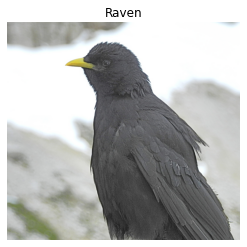

In [ ]:
# Visulaizing random images
arr =[] 
label = random.choice(class_names)
path = "/content/test"
basepath = os.path.join(path, label)
for fname in os.listdir(basepath):
    path = os.path.join(basepath, fname)
    if not os.path.isdir(path):
        # skip directories
        arr.append(path)
        continue

# Plotting the image
choice = random.choice(arr)
img = plt.imread(choice)
plt.axis(False)
plt.title(label)
plt.imshow(img/255.);

In [ ]:
def show():
  arr =[] 
  label = random.choice(class_names)
  path = "/content/train"
  basepath = os.path.join(path, label)
  for fname in os.listdir(basepath):
      path = os.path.join(basepath, fname)
      if not os.path.isdir(path):
          # skip directories
          arr.append(path)
          continue

  # Plotting the image
  img = random.choice(arr)
  
  return img, label


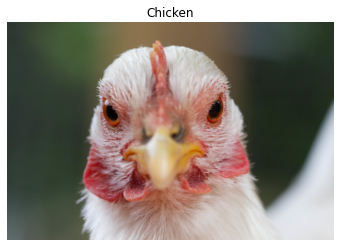

In [ ]:
img, label = show()
img = plt.imread(img)
plt.axis(False)
plt.title(label)
plt.imshow(img/255.);

### Visualizing multiple random images

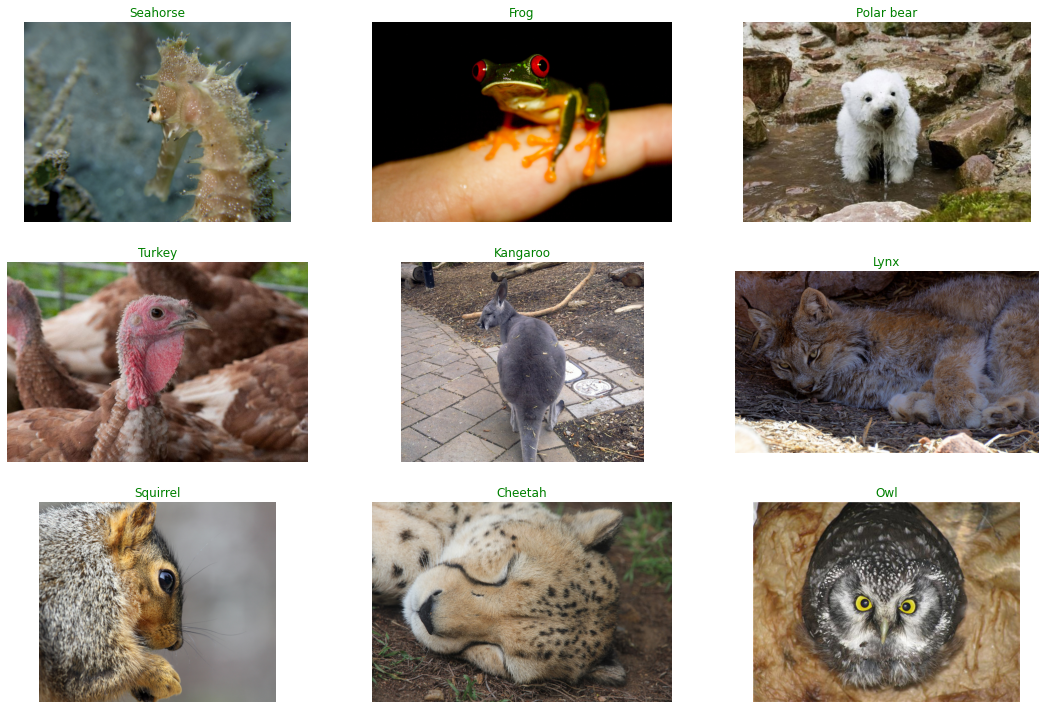

In [ ]:
fig, axs = plt.subplots(3, 3)
fig.set_size_inches(18.5, 12.5)
for i in range(0, 3):
  for j in range(0, 3):
    img, label = show()
    img = plt.imread(img)
    axs[i, j].axis(False)
    axs[i, j].set_title(label, color="green")
    axs[i, j].imshow(img/255.)

## Data Augmentation Layer

In [ ]:
# Create a data augmentation stage with horizontal flipping, rotations, zooms
data_augmentation = keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2)
], name ="data_augmentation")

### Visualizing Augmented images

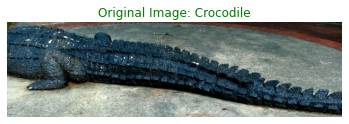

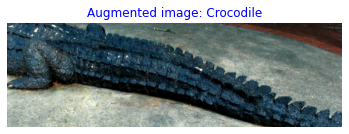

In [ ]:
# Orignal Image
bpath = "/content/train"
c_class = random.choice(class_names)
fpath = os.path.join(bpath, c_class)
c_file = random.choice(os.listdir(fpath))
if c_file == "Label":
  c_file = random.choice(os.listdir(fpath))
path = os.path.join(fpath, c_file)
img = plt.imread(path)
plt.axis(False)
plt.imshow(img)
plt.title(f"Original Image: {c_class}", color="green");

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) 
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Augmented image: {c_class}", color="blue")
plt.axis(False);

## Models
From here we will train a series of different models till we get a satisfying accuracy.

### Model 1 - EfficientNetB0
Training our first model - `EfficientNetB0`

In [ ]:
# Setting up base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Setup model architecture with trainable top layers
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="Global_average_pooling_layer")(x)
outputs = tf.keras.layers.Dense(len(class_names), activation="softmax", name="output_layer")(x)
model_1 = tf.keras.Model(inputs, outputs)

# Compiling the model
model_1.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fitting the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=0.25 * len(test_data))

Epoch 1/5
706/706 [==============================] - 385s 494ms/step - loss: 1.4190 - accuracy: 0.6520 - val_loss: 0.8912 - val_accuracy: 0.7567
Epoch 2/5
706/706 [==============================] - 309s 434ms/step - loss: 0.8786 - accuracy: 0.7439 - val_loss: 0.7554 - val_accuracy: 0.7868
Epoch 3/5
706/706 [==============================] - 285s 400ms/step - loss: 0.7810 - accuracy: 0.7640 - val_loss: 0.7334 - val_accuracy: 0.7911
Epoch 4/5
706/706 [==============================] - 274s 385ms/step - loss: 0.7119 - accuracy: 0.7820 - val_loss: 0.7344 - val_accuracy: 0.7880
Epoch 5/5
706/706 [==============================] - 269s 378ms/step - loss: 0.6792 - accuracy: 0.7889 - val_loss: 0.7456 - val_accuracy: 0.7831


In [ ]:
model_1.evaluate(test_data)

204/204 [==============================] - 66s 325ms/step - loss: 0.6638 - accuracy: 0.8020


[0.6637811064720154, 0.8019984364509583]

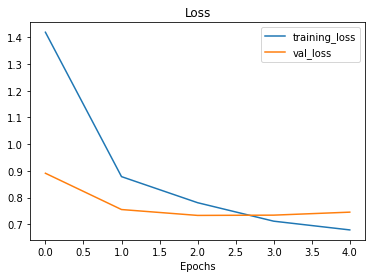

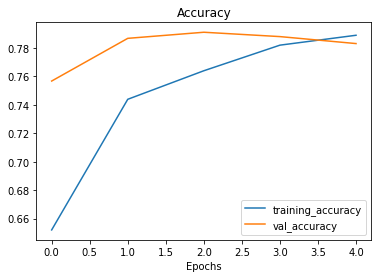

In [ ]:
plot_loss_curves(history_1)

In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
Global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 80)                102480    
Total params: 4,152,051
Trainable params: 102,480
Non-trainable params: 4,049,571
_________________________________________________________________


#### Fine tuning Model 1

In [ ]:
# Unfreeze all of the layers in the base model
base_model.trainable = True

# Refreeze every layer except for the last 5
for layer in base_model.layers[:-5]:
  layer.trainable = False

In [ ]:
# Recompile model with lower learning rate
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(1e-4),
                metrics=['accuracy'])

In [ ]:
# Fine-tune for 5 more epochs
fine_tune_epochs = 10 

history_1_fine_tune_1 = model_1.fit(train_data,
                                    epochs=fine_tune_epochs,
                                    validation_data=test_data,
                                    validation_steps=0.25 * len(test_data), 
                                    initial_epoch=history_1.epoch[-1])

Epoch 5/10
706/706 [==============================] - 277s 379ms/step - loss: 0.6091 - accuracy: 0.8048 - val_loss: 0.7274 - val_accuracy: 0.7837
Epoch 6/10
706/706 [==============================] - 264s 371ms/step - loss: 0.5571 - accuracy: 0.8183 - val_loss: 0.7294 - val_accuracy: 0.7837
Epoch 7/10
706/706 [==============================] - 260s 365ms/step - loss: 0.5251 - accuracy: 0.8263 - val_loss: 0.7169 - val_accuracy: 0.7849
Epoch 8/10
706/706 [==============================] - 260s 364ms/step - loss: 0.4930 - accuracy: 0.8336 - val_loss: 0.7313 - val_accuracy: 0.7825
Epoch 9/10
706/706 [==============================] - 260s 365ms/step - loss: 0.4660 - accuracy: 0.8429 - val_loss: 0.7299 - val_accuracy: 0.7812
Epoch 10/10
706/706 [==============================] - 258s 362ms/step - loss: 0.4344 - accuracy: 0.8517 - val_loss: 0.7542 - val_accuracy: 0.7757


In [ ]:
model_1.evaluate(test_data)

204/204 [==============================] - 66s 324ms/step - loss: 0.6667 - accuracy: 0.8040


[0.6667168736457825, 0.8039969205856323]

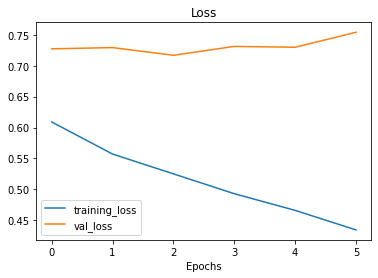

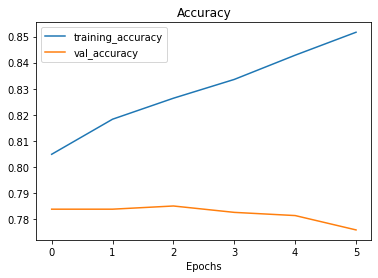

In [ ]:
plot_loss_curves(history_1_fine_tune_1)

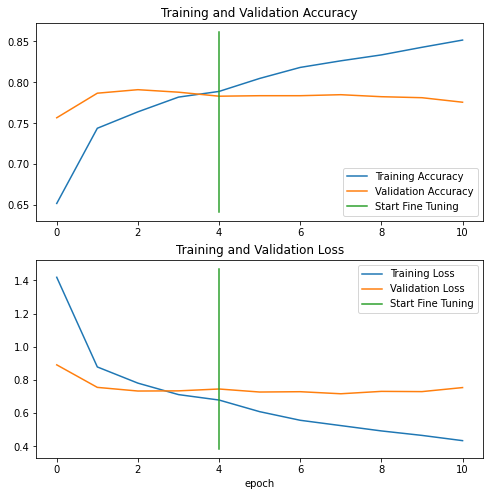

In [ ]:
compare_historys(history_1, history_1_fine_tune_1, initial_epochs=5)

### Model 2 - MobilienetV2
For the second model we will train a `MobilienetV2`

In [ ]:
# Setting up base model
base_model = tf.keras.applications.MobileNetV2(include_top=False)
base_model.trainable = False

# Setup model architecture with trainable top layers
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = data_augmentation(x)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="Global_average_pooling_layer")(x)
outputs = tf.keras.layers.Dense(len(class_names), activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

# Compiling the model
model_2.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fitting the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=0.25 * len(test_data))

706/706 [==============================] - 265s 367ms/step - loss: 1.7895 - accuracy: 0.5510 - val_loss: 1.2218 - val_accuracy: 0.6765
Epoch 2/5
706/706 [==============================] - 250s 351ms/step - loss: 1.2853 - accuracy: 0.6457 - val_loss: 1.0012 - val_accuracy: 0.7120
Epoch 3/5
706/706 [==============================] - 250s 350ms/step - loss: 1.1951 - accuracy: 0.6644 - val_loss: 0.9694 - val_accuracy: 0.7206
Epoch 4/5
706/706 [==============================] - 249s 350ms/step - loss: 1.1450 - accuracy: 0.6748 - val_loss: 0.9085 - val_accuracy: 0.7255
Epoch 5/5
706/706 [==============================] - 248s 348ms/step - loss: 1.0904 - accuracy: 0.6878 - val_loss: 0.8025 - val_accuracy: 0.7610


In [ ]:
model_2.evaluate(test_data)

204/204 [==============================] - 62s 304ms/step - loss: 0.9046 - accuracy: 0.7470


[0.9046367406845093, 0.7469638586044312]

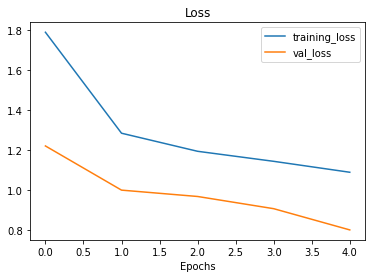

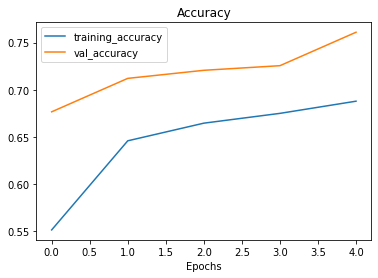

In [ ]:
plot_loss_curves(history_2)

In [ ]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
rescaling_6 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, None, None, 1280)  2257984   
_________________________________________________________________
Global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 80)                102480    
Total params: 2,360,464
Trainable params: 102,480
Non-trainable params: 2,257,984
___________________________________________

#### Training for more 5 epochs

In [ ]:
# Fitting the model for more 5 epochs
history_3 = model_2.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=0.25 * len(test_data),
                        initial_epoch=history_2.epoch[-1])

Epoch 5/10
706/706 [==============================] - 249s 349ms/step - loss: 1.0426 - accuracy: 0.7021 - val_loss: 0.8679 - val_accuracy: 0.7433
Epoch 6/10
706/706 [==============================] - 246s 345ms/step - loss: 1.0269 - accuracy: 0.6988 - val_loss: 0.9560 - val_accuracy: 0.7249
Epoch 7/10
706/706 [==============================] - 245s 343ms/step - loss: 1.0244 - accuracy: 0.7042 - val_loss: 0.9563 - val_accuracy: 0.7175
Epoch 8/10
706/706 [==============================] - 245s 344ms/step - loss: 0.9984 - accuracy: 0.7081 - val_loss: 1.0016 - val_accuracy: 0.7077
Epoch 9/10
706/706 [==============================] - 244s 342ms/step - loss: 0.9750 - accuracy: 0.7147 - val_loss: 0.9553 - val_accuracy: 0.7224
Epoch 10/10
706/706 [==============================] - 244s 343ms/step - loss: 0.9610 - accuracy: 0.7140 - val_loss: 1.0077 - val_accuracy: 0.7181


In [ ]:
model_2.evaluate(test_data)

204/204 [==============================] - 62s 302ms/step - loss: 0.9911 - accuracy: 0.7305


[0.9911302328109741, 0.7305150032043457]

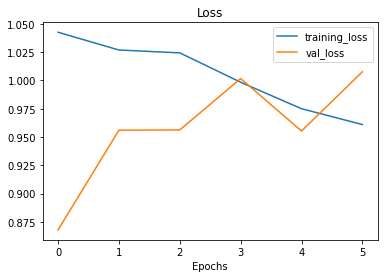

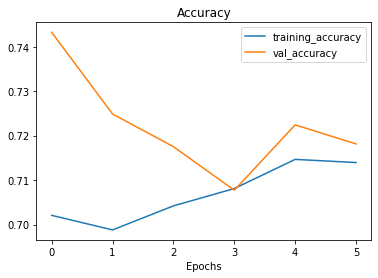

In [ ]:
plot_loss_curves(history_3)

#### Fine tuning Model 2

In [ ]:
# Unfreeze all of the layers in the base model
base_model.trainable = True

# Refreeze every layer except for the last 5
for layer in base_model.layers[:-15]:
  layer.trainable = False

# Recompile model with lower learning rate
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(1e-4),
                metrics=['accuracy'])

# Fine-tune for 5 more epochs
fine_tune_epochs = 10

history_2_fine_tune_1 = model_2.fit(train_data,
                                    epochs=fine_tune_epochs,
                                    validation_data=test_data,
                                    validation_steps=0.25 * len(test_data), 
                                    initial_epoch=history_2.epoch[-1])

Epoch 5/10
706/706 [==============================] - 251s 349ms/step - loss: 1.0266 - accuracy: 0.6926 - val_loss: 1.1079 - val_accuracy: 0.6881
Epoch 6/10
706/706 [==============================] - 247s 347ms/step - loss: 0.9163 - accuracy: 0.7162 - val_loss: 1.0497 - val_accuracy: 0.6961
Epoch 7/10
706/706 [==============================] - 247s 346ms/step - loss: 0.8299 - accuracy: 0.7394 - val_loss: 1.0409 - val_accuracy: 0.7145
Epoch 8/10
706/706 [==============================] - 245s 344ms/step - loss: 0.7846 - accuracy: 0.7507 - val_loss: 1.0553 - val_accuracy: 0.6998
Epoch 9/10
706/706 [==============================] - 245s 343ms/step - loss: 0.7434 - accuracy: 0.7647 - val_loss: 1.0220 - val_accuracy: 0.7010
Epoch 10/10
706/706 [==============================] - 244s 342ms/step - loss: 0.6925 - accuracy: 0.7787 - val_loss: 1.1357 - val_accuracy: 0.6906


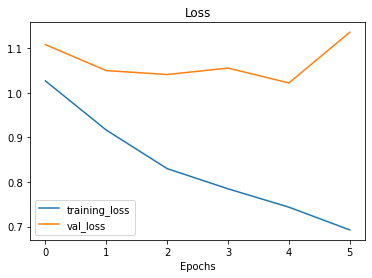

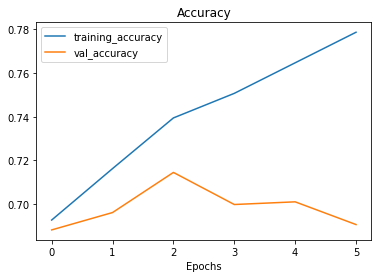

In [ ]:
plot_loss_curves(history_2_fine_tune_1)

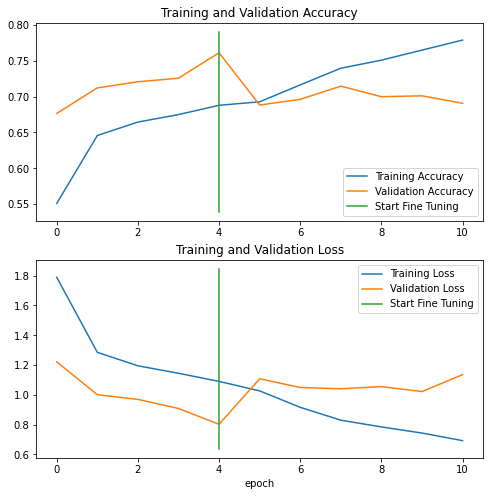

In [ ]:
compare_historys(history_2, history_2_fine_tune_1, initial_epochs=5)

## Saving and loading the best model

In [ ]:
model_1.save("/content/drive/MyDrive/Vertebrate")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Vertebrate/assets


In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Vertebrate")

## Insights of the Model

In [ ]:
pred_probs = model.predict(test_data)

In [ ]:
pred_probs[0]

array([9.95746434e-01, 7.98750261e-04, 5.36264724e-06, 5.04913260e-07,
       1.80242228e-06, 2.08619166e-08, 9.17762882e-05, 5.99489340e-06,
       3.99222199e-06, 1.12156783e-07, 9.10530889e-06, 3.89620510e-07,
       2.17189694e-07, 9.07555091e-07, 5.87315844e-06, 3.00074444e-05,
       8.74887701e-06, 1.51713975e-05, 9.47852095e-06, 6.63890069e-06,
       6.48519699e-06, 1.41525030e-04, 1.03216178e-06, 1.35053469e-05,
       8.20562946e-06, 2.04325170e-06, 6.34944445e-05, 1.47582487e-05,
       9.34305717e-06, 5.56890996e-08, 4.82232281e-06, 5.42736927e-07,
       1.75819594e-06, 2.15488535e-06, 4.47753692e-08, 1.30741171e-06,
       1.69339437e-05, 1.89190686e-07, 8.86139969e-06, 2.32440839e-03,
       1.22100903e-06, 1.60957170e-05, 4.07277548e-06, 2.14648855e-04,
       2.53343387e-05, 1.63850160e-08, 6.32403589e-06, 5.81048774e-08,
       7.91709408e-06, 1.04315208e-04, 5.36949738e-05, 3.50652613e-07,
       2.34109993e-05, 9.28517875e-06, 4.08919550e-06, 2.30036420e-07,
      

In [ ]:
pred_probs[0].argmax()

0

In [ ]:
pred_classes = pred_probs.argmax(axis=1)
pred_classes[:10]

array([ 0,  0, 54, 54,  0, 54, 40, 54, 54, 54])

In [ ]:
len(pred_classes), len(pred_probs)

(6505, 6505)

In [ ]:
y_labels = []
for images, labels in test_data.unbatch(): # unbatch the test data and get images and labels
  y_labels.append(labels.numpy().argmax()) # append the index which has the largest value (labels are one-hot)
y_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
len(y_labels)

6505

The matrix will be more clear and easy to understand if you open the image in a new tab and zoom in a bit.

### Plotting Confusion matrix

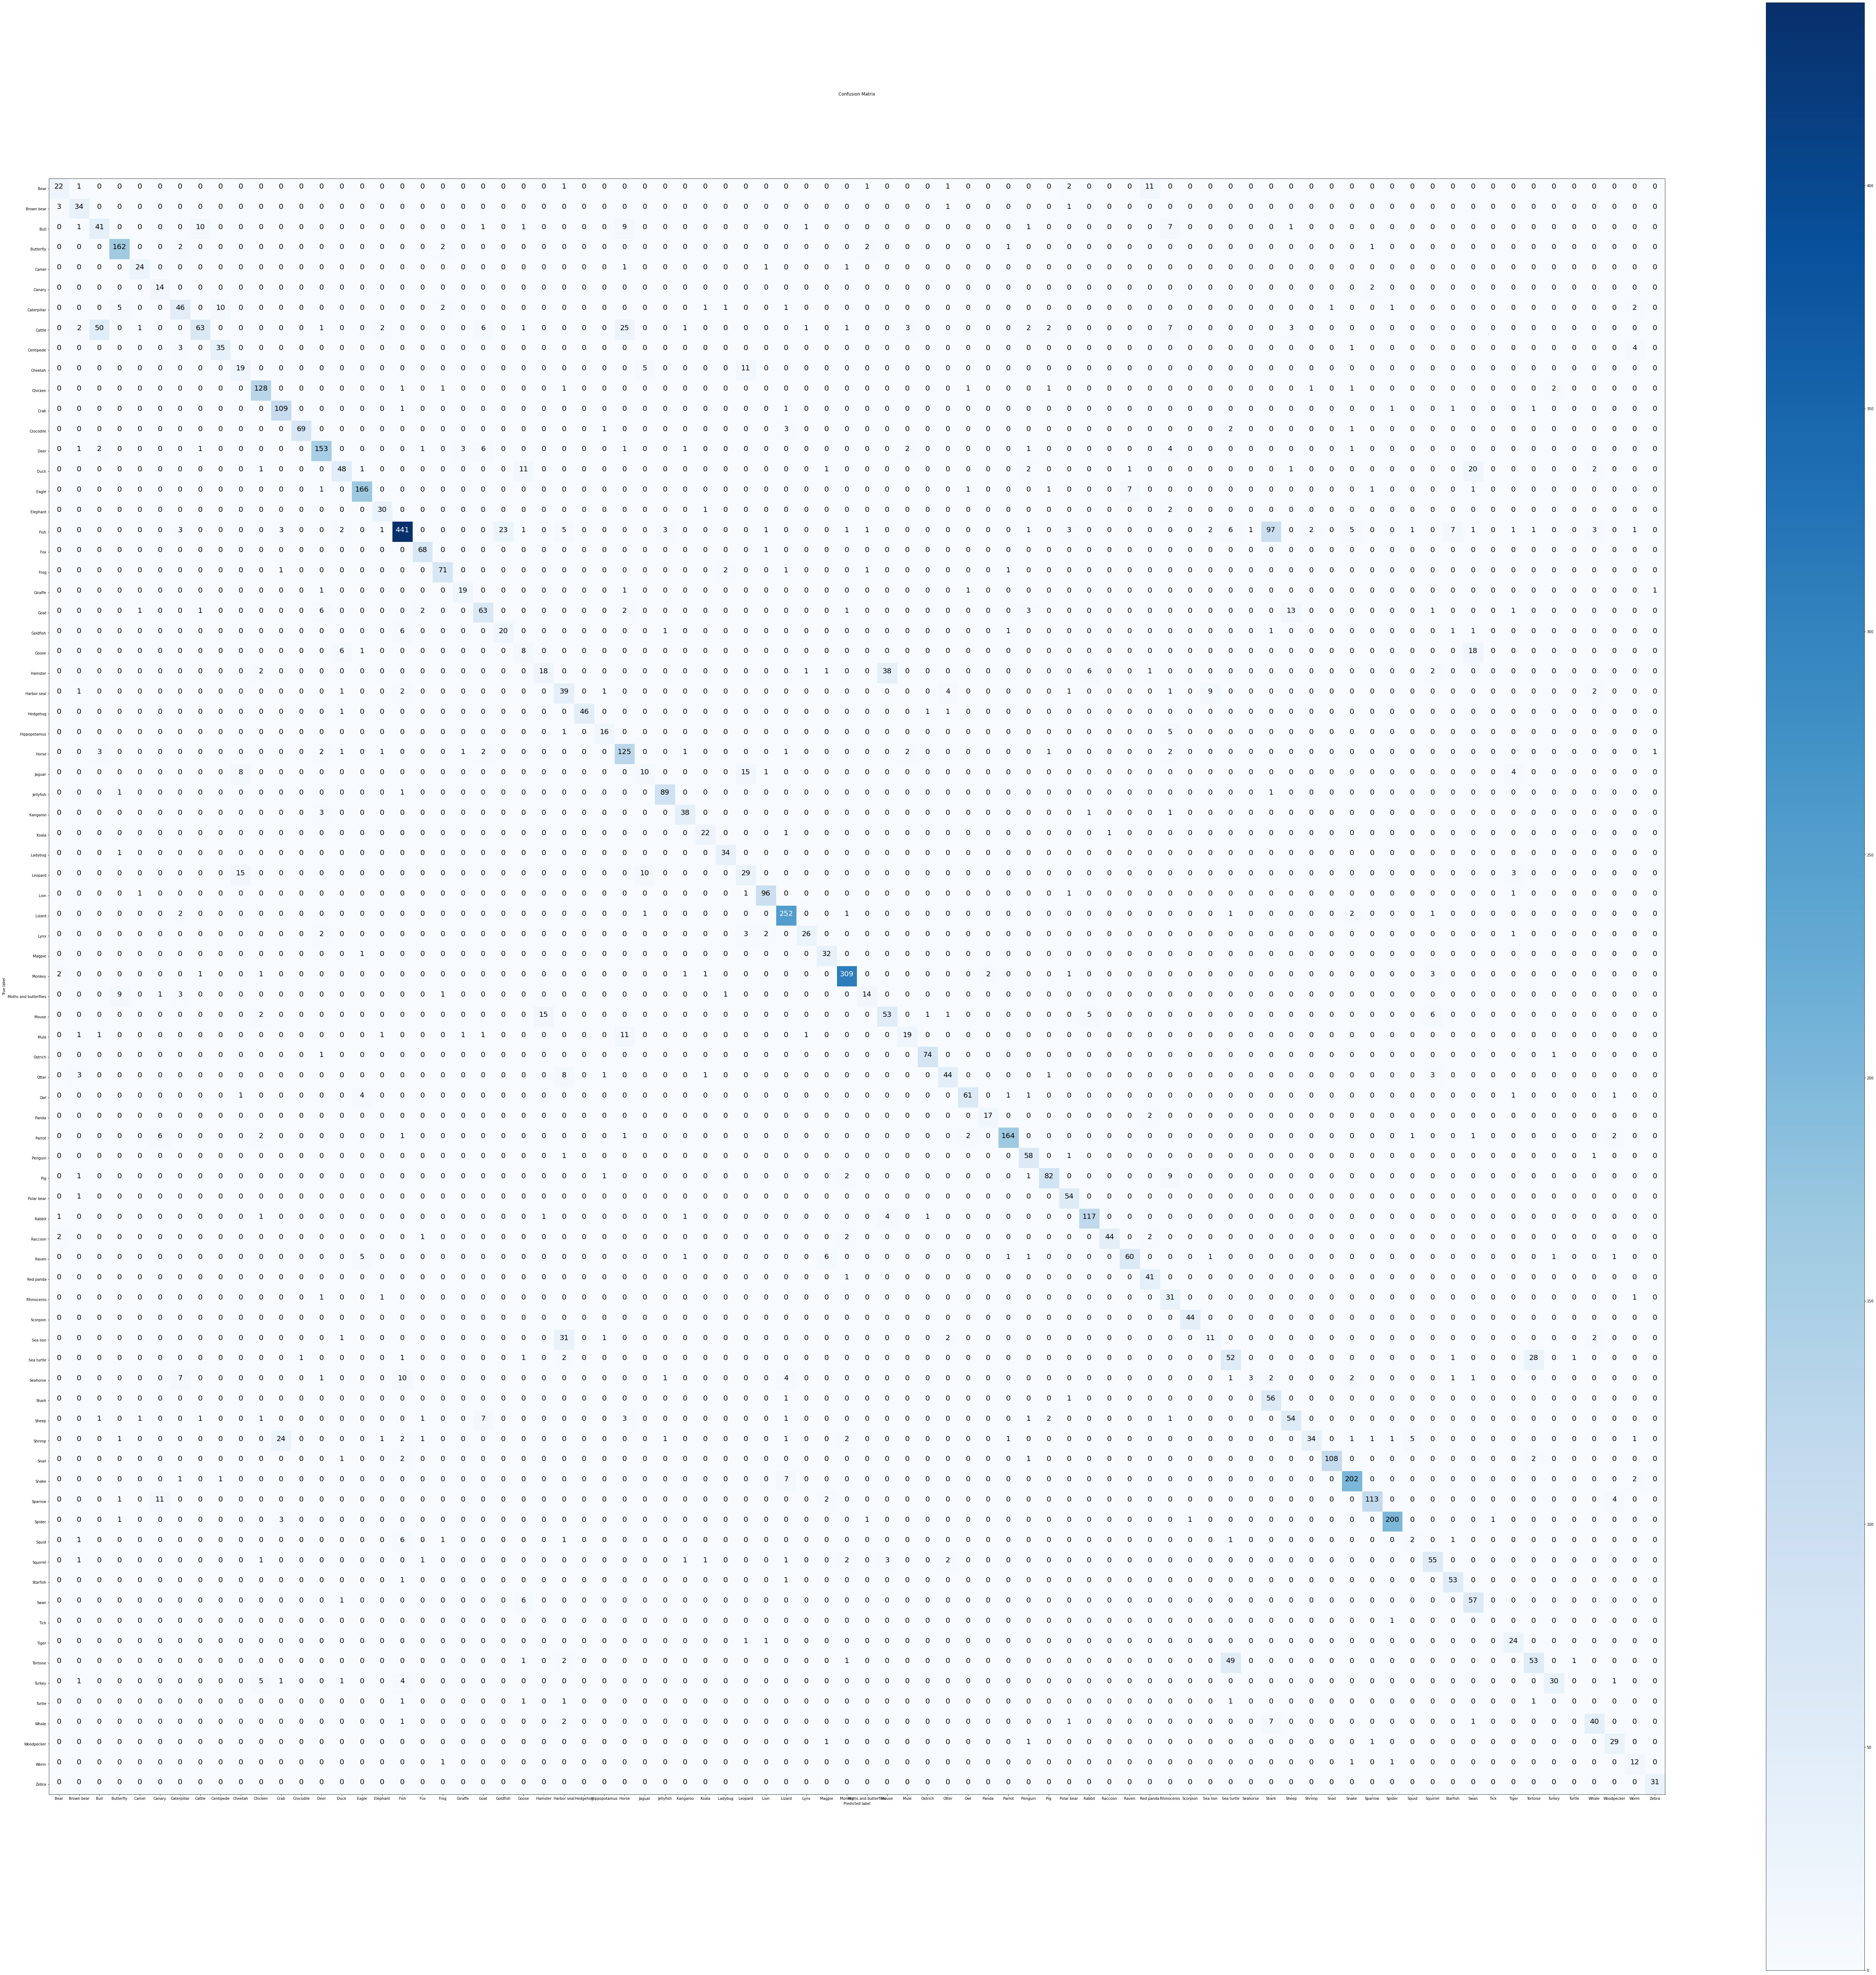

In [ ]:
# Plotting a confusion matrix
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=20,
                      norm=False,
                      savefig=True)

### Classification report

In [ ]:
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.73      0.56      0.64        39
           1       0.69      0.87      0.77        39
           2       0.42      0.56      0.48        73
           3       0.90      0.95      0.92       170
           4       0.86      0.89      0.87        27
           5       0.44      0.88      0.58        16
           6       0.69      0.66      0.67        70
           7       0.82      0.37      0.51       171
           8       0.76      0.81      0.79        43
           9       0.44      0.54      0.49        35
          10       0.89      0.93      0.91       137
          11       0.77      0.96      0.85       114
          12       0.99      0.91      0.95        76
          13       0.89      0.86      0.88       177
          14       0.76      0.55      0.64        88
          15       0.93      0.93      0.93       178
          16       0.81      0.91      0.86        33
          17       0.92    

In [ ]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'f1-score': 0.6376811594202899,
  'precision': 0.7333333333333333,
  'recall': 0.5641025641025641,
  'support': 39},
 '1': {'f1-score': 0.7727272727272728,
  'precision': 0.6938775510204082,
  'recall': 0.8717948717948718,
  'support': 39},
 '10': {'f1-score': 0.9110320284697508,
  'precision': 0.8888888888888888,
  'recall': 0.9343065693430657,
  'support': 137},
 '11': {'f1-score': 0.8549019607843137,
  'precision': 0.7730496453900709,
  'recall': 0.956140350877193,
  'support': 114},
 '12': {'f1-score': 0.9452054794520548,
  'precision': 0.9857142857142858,
  'recall': 0.9078947368421053,
  'support': 76},
 '13': {'f1-score': 0.8767908309455587,
  'precision': 0.8895348837209303,
  'recall': 0.864406779661017,
  'support': 177},
 '14': {'f1-score': 0.6357615894039735,
  'precision': 0.7619047619047619,
  'recall': 0.5454545454545454,
  'support': 88},
 '15': {'f1-score': 0.9325842696629213,
  'precision': 0.9325842696629213,
  'recall': 0.9325842696629213,
  'support': 178},


In [ ]:
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report items
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
    # Append class names and f1-scores to new dictionary
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'Bear': 0.6376811594202899,
 'Brown bear': 0.7727272727272728,
 'Bull': 0.4795321637426901,
 'Butterfly': 0.9230769230769231,
 'Camel': 0.8727272727272727,
 'Canary': 0.5833333333333334,
 'Caterpillar': 0.6715328467153284,
 'Cattle': 0.5080645161290323,
 'Centipede': 0.7865168539325844,
 'Cheetah': 0.48717948717948717,
 'Chicken': 0.9110320284697508,
 'Crab': 0.8549019607843137,
 'Crocodile': 0.9452054794520548,
 'Deer': 0.8767908309455587,
 'Duck': 0.6357615894039735,
 'Eagle': 0.9325842696629213,
 'Elephant': 0.8571428571428571,
 'Fish': 0.8032786885245903,
 'Fox': 0.9444444444444444,
 'Frog': 0.9102564102564102,
 'Giraffe': 0.8085106382978724,
 'Goat': 0.7,
 'Goldfish': 0.5405405405405406,
 'Goose': 0.25,
 'Hamster': 0.34951456310679613,
 'Harbor seal': 0.5,
 'Hedgehog': 0.968421052631579,
 'Hippopotamus': 0.7441860465116279,
 'Horse': 0.7763975155279503,
 'Jaguar': 0.3125,
 'Jellyfish': 0.9518716577540107,
 'Kangaroo': 0.8636363636363636,
 'Koala': 0.8627450980392156,
 'Ladybug': 

In [ ]:
# Turn f1-scores into dataframe for visualization
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores

class_name  f1-score
56   Scorpion  0.988764
66     Spider  0.970874
79      Zebra  0.968750
63      Snail  0.968610
26   Hedgehog  0.968421
..        ...       ...
23      Goose  0.250000
67      Squid  0.181818
59   Seahorse  0.162162
75     Turtle  0.000000
71       Tick  0.000000

[80 rows x 2 columns]

### Plotting F-1 scores

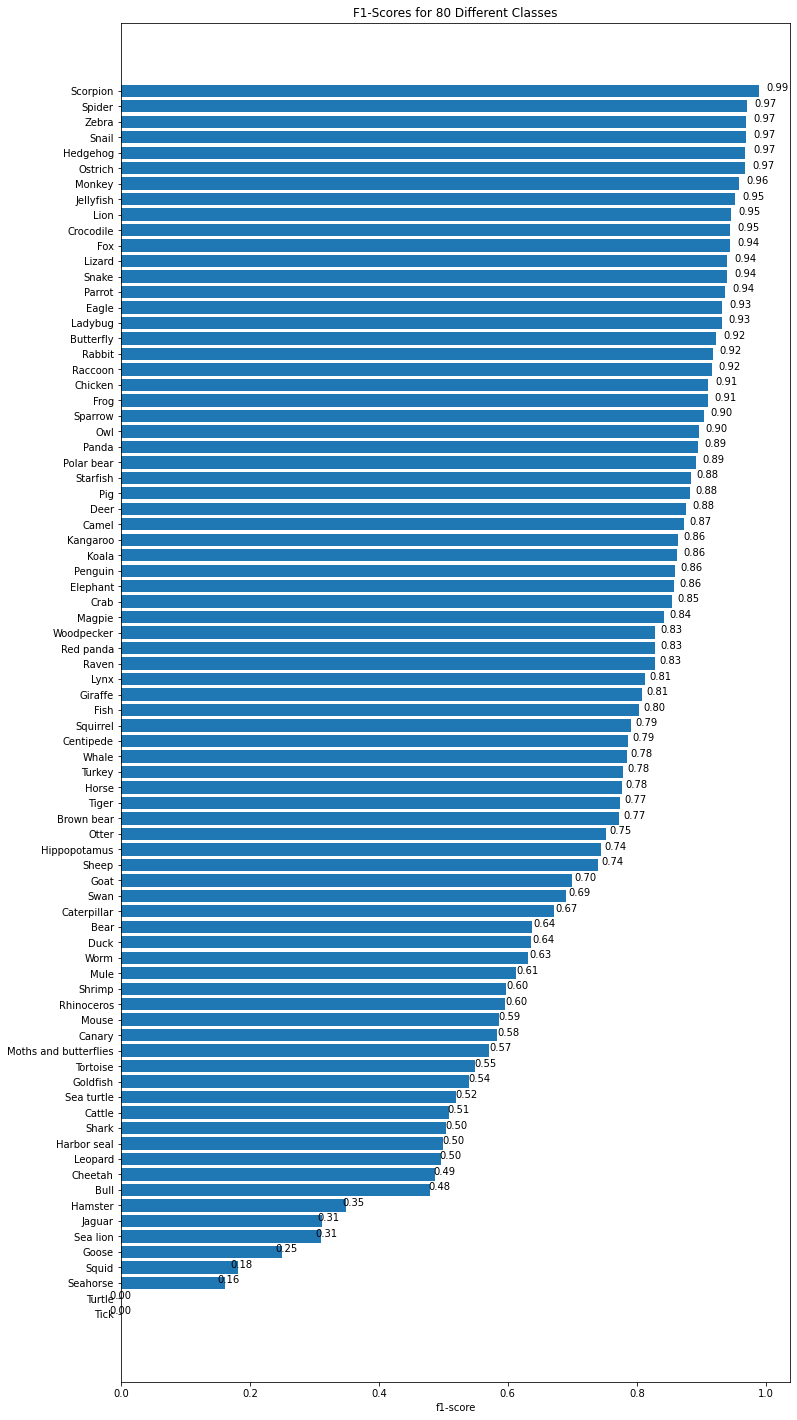

In [ ]:
fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 80 Different Classes")
ax.invert_yaxis(); # reverse the order

def autolabel(rects):
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)

## Predictions

In [ ]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

### Confused predictions

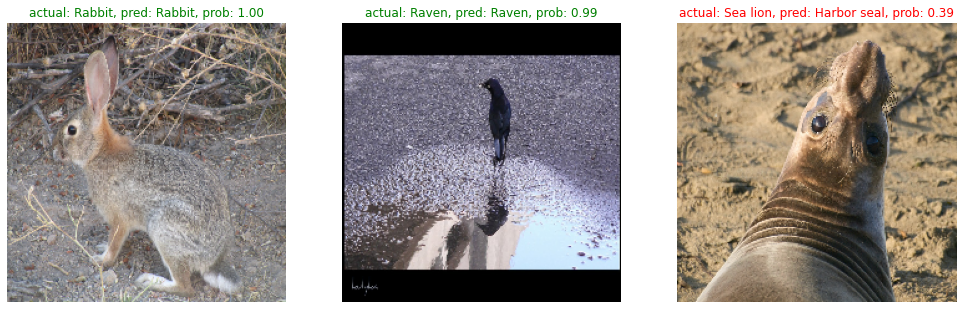

In [ ]:
plt.figure(figsize=(17, 10))
for i in range(3):
  # Choose a random image from a random class 
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + "/" + class_name + "/" + filename

  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class 

  # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);

In [ ]:
arr=[]
for el in class_names:
  path = "/content/test"
  basepath = os.path.join(path, el)
  for fname in os.listdir(basepath):
      path = os.path.join(basepath, fname)
      if not os.path.isdir(path):
          # skip directories
          arr.append(path)
          continue

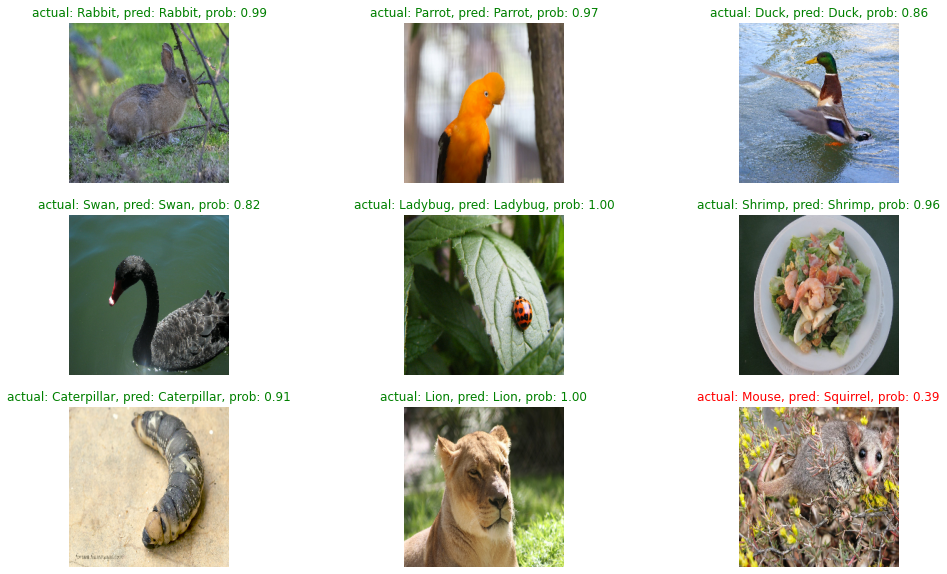

In [ ]:
plt.figure(figsize=(17, 10))
for i in range(9):
  # Choose a random image from a random class 
  filepath = random.choice(arr)
  class_name = filepath.split("/")[3]

  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class 

  # Plot the image(s)
  plt.subplot(3, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);

In [ ]:
# Get the filenames of all of our test data
filepaths = []
for filepath in test_data.list_files("/content/test/*/*.jpg", 
                                     shuffle=False):
  filepaths.append(filepath.numpy())
filepaths[:10]

[b'/content/test/Bear/0df78ee76bafd3a9.jpg',
 b'/content/test/Bear/0f899aca6d0fb6e1.jpg',
 b'/content/test/Bear/1cca48c57103a42c.jpg',
 b'/content/test/Bear/1fa809bf6cf5ea36.jpg',
 b'/content/test/Bear/200046eca85cd992.jpg',
 b'/content/test/Bear/23bf858cb1d0ef63.jpg',
 b'/content/test/Bear/23d1d39d81d411da.jpg',
 b'/content/test/Bear/322e901e952ea866.jpg',
 b'/content/test/Bear/3d77555f2ede0b38.jpg',
 b'/content/test/Bear/3df2b6a098712fee.jpg']

In [ ]:
pred_df = pd.DataFrame({"img_path": filepaths,
                        "y_true": y_labels,
                        "y_pred": pred_classes,
                        "pred_conf": pred_probs.max(axis=1), # get the maximum prediction probability value
                        "y_true_classname": [class_names[i] for i in y_labels],
                        "y_pred_classname": [class_names[i] for i in pred_classes]}) 
pred_df.head()

img_path  ...  y_pred_classname
0  b'/content/test/Bear/0df78ee76bafd3a9.jpg'  ...              Bear
1  b'/content/test/Bear/0f899aca6d0fb6e1.jpg'  ...              Bear
2  b'/content/test/Bear/1cca48c57103a42c.jpg'  ...         Red panda
3  b'/content/test/Bear/1fa809bf6cf5ea36.jpg'  ...         Red panda
4  b'/content/test/Bear/200046eca85cd992.jpg'  ...              Bear

[5 rows x 6 columns]

In [ ]:
# check for pred 
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df.head()

img_path  ...  pred_correct
0  b'/content/test/Bear/0df78ee76bafd3a9.jpg'  ...          True
1  b'/content/test/Bear/0f899aca6d0fb6e1.jpg'  ...          True
2  b'/content/test/Bear/1cca48c57103a42c.jpg'  ...         False
3  b'/content/test/Bear/1fa809bf6cf5ea36.jpg'  ...         False
4  b'/content/test/Bear/200046eca85cd992.jpg'  ...          True

[5 rows x 7 columns]

In [ ]:
# Get the top 100 wrong examples
top_100_wrong = pred_df[pred_df["pred_correct"] == False].sort_values("pred_conf", ascending=False)[:100]
top_100_wrong.head(20)

img_path  ...  pred_correct
5702      b'/content/test/Sparrow/4ecd53011e47f224.jpg'  ...         False
37           b'/content/test/Bear/f0cd1050b09dd625.jpg'  ...         False
3            b'/content/test/Bear/1fa809bf6cf5ea36.jpg'  ...         False
1906         b'/content/test/Fish/ad6768f15203ed1a.jpg'  ...         False
9            b'/content/test/Bear/3df2b6a098712fee.jpg'  ...         False
4715      b'/content/test/Raccoon/3df2b6a098712fee.jpg'  ...         False
2264      b'/content/test/Giraffe/8e989aae24d45230.jpg'  ...         False
1889         b'/content/test/Fish/a704ec4be2217b23.jpg'  ...         False
1617         b'/content/test/Fish/39eb679fc9ba8a0f.jpg'  ...         False
1558         b'/content/test/Fish/237302d5580cc2fd.jpg'  ...         False
20           b'/content/test/Bear/9e411cef88b11bb7.jpg'  ...         False
2620  b'/content/test/Hippopotamus/6defd81749de10a0....  ...         False
2014         b'/content/test/Fish/db3798bf28e1a847.jpg'  ...         False
1546         b'/content/test/Fish/1d59db2495553468.jpg'  ...         False
1811         b'/content/test/Fish/86d0b8f94d5b0024.jpg'  ...         False
4178        b'/content/test/Panda/c14db25ce91e4398.jpg'  ...         False
1894         b'/content/test/Fish/a90853d412ac901b.jpg'  ...         False
7            b'/content/test/Bear/322e901e952ea866.jpg'  ...         False
5665      b'/content/test/Sparrow/14fce647401ac7c6.jpg'  ...         False
8            b'/content/test/Bear/3d77555f2ede0b38.jpg'  ...         False

[20 rows x 7 columns]

### Wrong Predictions

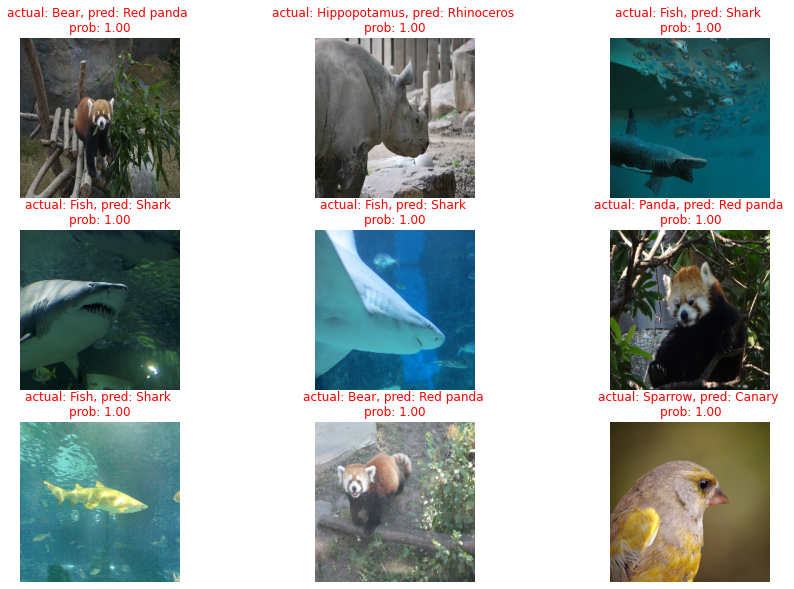

In [ ]:
# Visualize some of the most wrong examples
images_to_view = 9
start_index = 10 # change the start index to view more
plt.figure(figsize=(15, 10))
for i, row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()): 
  plt.subplot(3, 3, i+1)
  img = load_and_prep_image(row[1], scale=True)
  _, _, _, _, pred_prob, y_true, y_pred, _ = row # only interested in a few parameters of each row
  plt.imshow(img)
  plt.title(f"actual: {y_true}, pred: {y_pred} \nprob: {pred_prob:.2f}", color="red")
  plt.axis(False)